In [1]:
#import libraries
from openai import OpenAI
import pandas as pd
import fuzzywuzzy
from fuzzywuzzy import fuzz


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#connect API key

api_key = 'sk-proj-i6yAOfRT2t4D0InrukVNT3BlbkFJmziUI1Xv4KKLnbq9vk44'
client = OpenAI(api_key=api_key)

In [59]:
# EDA

amazon_data = pd.read_csv('./data_amazon.csv')
print(amazon_data)

# Make a function to explore the data (shape-size), drop missing values and duplicates
def EDA(data):
    print(f"Shape of the inital data: {data.shape}")        # print shape if inital data
    print(f"Size of the inital data: {data.size}")          # print size of inital data
    print()
    new_data = data.drop_duplicates()                   # drop duplicates

    print(f"Shape of the cleaned data: {new_data.shape}")   # print the shape of the cleaned data
    print(f"Size of the cleaned data: {new_data.size}")     # print the shape of the cleaned data

    return new_data                              # return only the first 50 rows of the cleaned data

cleaned_amazon_data = EDA(amazon_data).head(50)
cleaned_amazon_data_full = EDA(amazon_data)
cleaned_amazon_data.head()




                                    Title  \
0                                     NaN   
1                                     NaN   
2                 Some major design flaws   
3                        My favorite buy!   
4                        Flattering shirt   
..                                    ...   
294  Stunning, flattering, and versatile.   
295                        Pretty blouse!   
296                        Too distressed   
297                           Stunning...   
298                              Cute top   

                                                Review  Cons_rating  \
0    Absolutely wonderful - silky and sexy and comf...            4   
1    Love this dress!  it's sooo pretty.  i happene...            5   
2    I had such high hopes for this dress and reall...            3   
3    I love, love, love this jumpsuit. it's fun, fl...            5   
4    This shirt is very flattering to all due to th...            5   
..                               

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability,Price,Order Date,Delivered Date
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Intimates,0,0,0,1,0,28.780089,11/5/2022,11/13/2022
1,NaN,Love this dress! it's sooo pretty. i happene...,5,Dresses,0,1,0,0,0,85.363411,12/30/2022,1/7/2023
2,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,0,0,0,1,0,89.106540,3/21/2022,3/28/2022
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,0,0,0,0,0,17.210510,6/29/2022,7/4/2022
4,Flattering shirt,This shirt is very flattering to all due to th...,5,Blouses,0,1,0,0,0,28.391101,10/30/2022,11/7/2022


In [60]:
# Zero-shot prompt for extracting product name
def extract_product_name_zero_shot(df, prompt, column_name):
    """
    Extract product name using the OpenAI GPT-3.5-turbo API and return a DataFrame
    Parameters:
    - df: The input DataFrame
    - prompt: The prompt to use for task
    - column_name: The name of the column in df that contains the values for being used an input to the model.

    Returns:
    A DataFrame with the original review text and the extracted product name
    """
    # Initialize an empty list to hold results
    extract_data = []

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
    # Extract the row text
        row_text = row[column_name]

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": prompt},
                {"role": "user", "content": row_text}
            ]
        )

        extraction = response.choices[0].message.content.strip()
        extract_data.append({"Review": row_text, "Extracted Product Name": extraction})

        # Create a new DataFrame from our results
        extract_data_df = pd.DataFrame(extract_data)
    return extract_data_df

In [61]:

prompt = f"""Extract from the following customer review, present your answer in the following format: 'Product name'"""
column_name = 'Review'
df = cleaned_amazon_data

extracted_product_names_zero_shot = extract_product_name_zero_shot(df, prompt, column_name)
extracted_product_names_zero_shot

,Review,Extracted Product Name
0,Absolutely wonderful - silky and sexy and comf...,This review does not mention any specific prod...
1,Love this dress! it's sooo pretty. i happene...,Dress
2,I had such high hopes for this dress and reall...,dress
3,"I love, love, love this jumpsuit. it's fun, fl...",Jumpsuit
4,This shirt is very flattering to all due to th...,Shirt
5,"I love tracy reese dresses, but this one is no...",Tracy Reese dresses.
6,I aded this in my basket at hte last mintue to...,Tops
7,"I ordered this in carbon for store pick up, an...",Top with Shimmer in Carbon
8,I love this dress. i usually get an xs but it ...,Dress
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",'Retailer Dress'


In [62]:
import fuzzywuzzy
from fuzzywuzzy import fuzz

# Merge the cleaned data with the extracted columns
df = cleaned_amazon_data.merge(extracted_product_names_zero_shot, on="Review")

df['partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(x['Extracted Product Name'], x['Cloth_class']), axis=1)

# Keep only necessary columns
df_result_zero_shots = df[['Title', 'Review', 'Cloth_class', 'Extracted Product Name', 'partial_ratio']]

df_high_similarity_zero_shots = df_result_zero_shots[df_result_zero_shots['partial_ratio'] >= 50]
df_high_similarity_zero_shots

,Title,Review,Cloth_class,Extracted Product Name,partial_ratio
1,NaN,Love this dress! it's sooo pretty. i happene...,Dresses,Dress,100
2,Some major design flaws,I had such high hopes for this dress and reall...,Dresses,dress,80
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",Dresses,Tracy Reese dresses.,86
8,Flattering,I love this dress. i usually get an xs but it ...,Dresses,Dress,100
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Dresses,'Retailer Dress',77
10,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,Dresses,Dress,100
12,Perfect!!!,More and more i find myself reliant on the rev...,Dresses,Dress,100
14,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,Dresses,Dress for Holiday Gatherings,71
15,"Nice, but not for my body",I took these out of the package and wanted the...,Pants,Women's High-Waisted Linen Blend Pants,100
17,Looks great with white pants,Took a chance on this blouse and so glad i did...,Blouses,Blouse,100


In [63]:
# Calculate the mean score
zero_shot_score = df_high_similarity_zero_shots['partial_ratio'].mean(0)
print(f"Average score: {round(zero_shot_score,2)}%")

Average score: 87.83%


In [31]:
def extract_product_name_few_shots(df, column_name, prompt, few_shot_examples):
    """
    Extract product name using the OpenAI GPT-3.5-turbo API and return a DataFrame
    Parameters:
    - df: The input DataFrame
    - prompt: The prompt to use for task
    - column_name: The name of the column in df that contains the values for being used an input to the model.
    - few_shot_examples: A list of few-shot examples in a list format.

    Returns:
    A DataFrame with the original review text and the extracted product name
    """

    # Initialize an empty list to hold our results
    extracted_data = []
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        row_val = row[column_name]
        # Create the prompt with the few-shot examples and the current review
        full_prompt = prompt + "\n\n".join(few_shot_examples) + f"\n\n{row_val}"
        # Again here, you can change the content to experiment around
        response = client.chat.completions.create(model="gpt-3.5-turbo", messages=[
                                                    {"role": "system", "content": prompt},
                                                    {"role": "user", "content": full_prompt} ])
        extraction = response.choices[0].message.content
    # Append the review and its classification to our results list
        extracted_data.append({"Review": row_val, "Extracted Product Name": extraction})

    # Create a new DataFrame from our results
    extract_data_df = pd.DataFrame(extracted_data)

    return extract_data_df

In [32]:
# Test the function
column_name = 'Review'
prompt = """Identify the product name from the following customer review.
            Format your response as follows: Product Name"""
few_shot_examples = """ "Absolutely wonderful - silky and sexy and comfortable": Intimates,
                        "Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.": Dresses,
                        "I adore the fit and color of the Silk Wrap Dress.": Silk Wrap Dress
                        "The Denim Jacket goes with everything in my wardrobe.": Denim Jacket"""

extracted_product_names_few_shots = extract_product_name_few_shots(cleaned_amazon_data, column_name, prompt, few_shot_examples)

extracted_product_names_few_shots.head()

,Review,Extracted Product Name
0,I had such high hopes for this dress and reall...,Silk Wrap Dress
1,"I love, love, love this jumpsuit. it's fun, fl...",Jumpsuit
2,This shirt is very flattering to all due to th...,Silk Wrap Dress
3,"I love tracy reese dresses, but this one is no...",Tracy Reese Dress
4,I aded this in my basket at hte last mintue to...,Silk Wrap Dress


In [33]:
# Merge the cleaned data with the extracted columns

df = cleaned_amazon_data.merge(extracted_product_names_few_shots, on="Review")
df['partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(x['Extracted Product Name'], x['Cloth_class']), axis=1)

# Keep only necessary columns
df_result_few_shots = df[['Title', 'Review', 'Cloth_class', 'Extracted Product Name', 'partial_ratio']]

df_high_similarity_few_shots = df_result_few_shots[df_result_few_shots['partial_ratio'] >= 50]
df_high_similarity_few_shots.head()

,Title,Review,Cloth_class,Extracted Product Name,partial_ratio
0,Some major design flaws,I had such high hopes for this dress and reall...,Dresses,Silk Wrap Dress,83
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",Dresses,Tracy Reese Dress,83
6,Flattering,I love this dress. i usually get an xs but it ...,Dresses,Silk Wrap Dress,83
7,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",Dresses,Silk Wrap Dress,83
8,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,Dresses,Silk Wrap Dress,83


# Question 2: Chain of thought to identify factors that influence sales variations

In [34]:
column_name = "Review"
prompt = f"""
Review: "I ordered this top in my usual size and am exchanging it for one size smaller.
it runs very generous, and so the sizing is a little off.
the style and quality are beautiful, so i am anxious to receive the smaller size."
Factors: size, style, quality
Format your response as follows: factor1, factor2, factor3"""

sale_factors = extract_product_name_zero_shot(cleaned_amazon_data, prompt, column_name)
sale_factors.head()

,Review,Extracted Product Name
0,I had such high hopes for this dress and reall...,"size, design, quality"
1,"I love, love, love this jumpsuit. it's fun, fl...","style, color, compliments"
2,This shirt is very flattering to all due to th...,"style, fit, versatility"
3,"I love tracy reese dresses, but this one is no...","size, style, quality"
4,I aded this in my basket at hte last mintue to...,"color, size, versatility"


# Question 3, proffitability

In [ ]:
# Calculate total income by summing prices per product category
class_income = cleaned_amazon_data_full.groupby('Cloth_class')['Price'].sum().reset_index()
class_income.columns = ['Product', 'Total Income']

# Sort class_income by Total Income in descending order
sorted_avg_price_df = class_income.sort_values(by='Total Income', ascending=False)

# Display the sorted DataFrame
print(f"Sorted by Total Income (Most to Least Profitable):\n{sorted_avg_price_df.round(2)}")

# Identify the highest and lowest profitability products based on the Total Income
highest_profitability = sorted_avg_price_df.iloc[0]
lowest_profitability = sorted_avg_price_df.iloc[-1]

print(f"\nHighest profitability product: {highest_profitability['Product']}, with Total Income: {round(highest_profitability['Total Income'], 2)}")
print(f"Lowest profitability product: {lowest_profitability['Product']}, with Total Income: {round(lowest_profitability['Total Income'], 2)}")

# Prepare for plotting
revenue_proxy_by_class = sorted_avg_price_df[['Product', 'Total Income']]

Sorted by Total Income (Most to Least Profitable):
       Product  Total Income
0      Blouses       2670.55
6        Knits       2567.90
1      Dresses       1979.71
10      Skirts       1341.06
2   Fine gauge        830.32
9        Pants        788.16
4      Jackets        726.81
7       Lounge        522.46
8    Outerwear        320.98
5        Jeans        308.36
11       Sleep        245.75
12    Sweaters        234.23
3    Intimates        170.94
13        Swim        124.38
14       Trend         20.77

Highest profitability product: Blouses, with Total Income: 2670.55
Lowest profitability product: Trend, with Total Income: 20.77


# Visualization

<Figure size 1000x600 with 0 Axes>

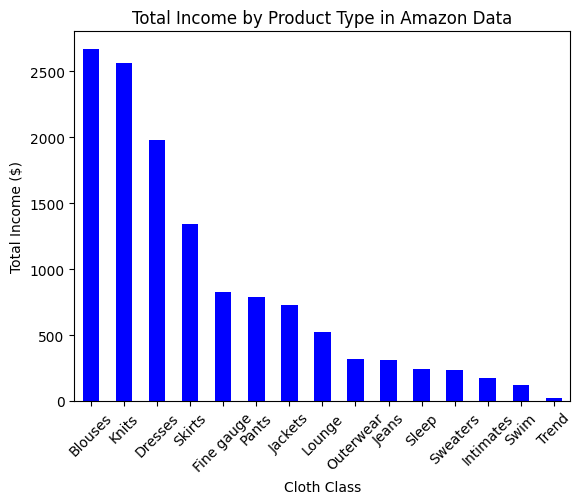

In [40]:
import matplotlib.pyplot as plt

# Set the "Product" column as the index for plotting
revenue_proxy_by_class.set_index('Product', inplace=True)

# Plotting average price by product type
plt.figure(figsize=(10, 6))
revenue_proxy_by_class.plot(kind='bar', color='blue', legend=False)
plt.xlabel("Cloth Class")
plt.ylabel("Total Income ($)")
plt.title("Total Income by Product Type in Amazon Data")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

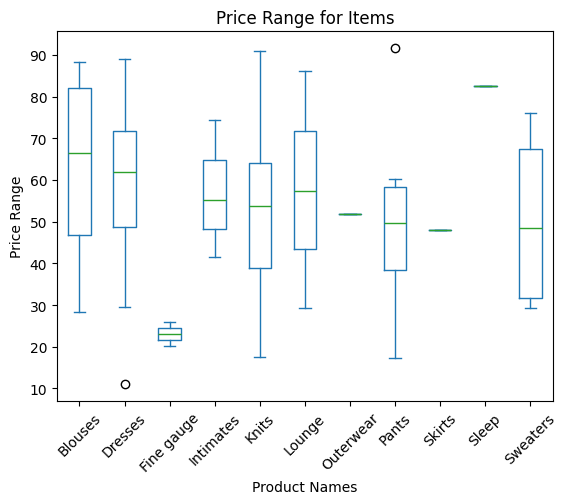

In [41]:
cleaned_amazon_data.plot(kind='box',column='Price', by='Cloth_class', grid=False)
plt.ylabel("Price Range")
plt.xlabel("Product Names")
plt.title("Price Range for Items")
plt.xticks(rotation=45)
plt.show()

### average rating


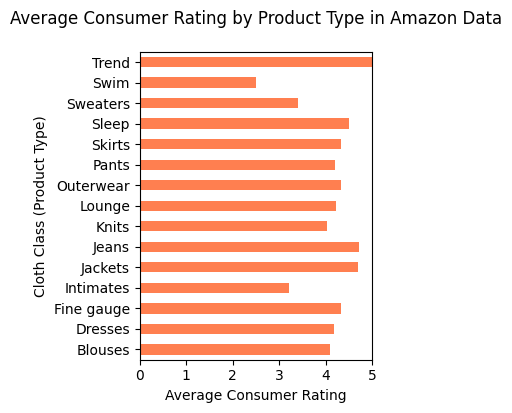

In [42]:
# Calculate average rating by Cloth_class (product type)
avg_rating_by_class = amazon_data.groupby('Cloth_class')['Cons_rating'].mean()

# Plotting average rating by product type
plt.figure(figsize=(3, 4))  # Adjust figure size to scale the chart
avg_rating_by_class.plot(kind='barh', color='coral')  # 'barh' creates a horizontal bar chart
plt.ylabel("Cloth Class (Product Type)")
plt.xlabel("Average Consumer Rating")
plt.title("Average Consumer Rating by Product Type in Amazon Data", pad=20)
plt.xlim(0, 5)  # Set x-axis limits to ensure all ratings fit within a range from 0 to 5
plt.show()

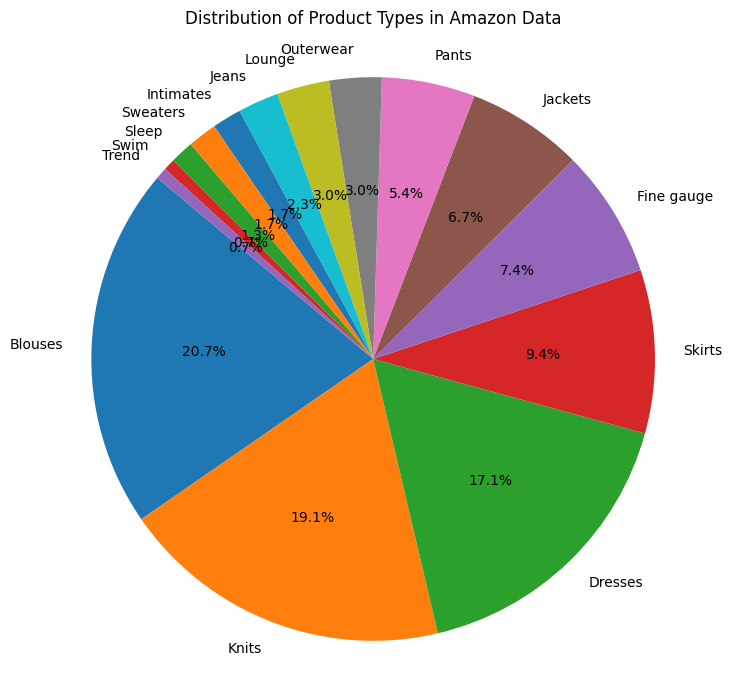

In [43]:
# Create a pie chart for the distribution of product types
product_distribution = amazon_data['Cloth_class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_distribution, labels=product_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Product Types in Amazon Data", pad=20)
plt.axis('equal')
plt.show()

### Section for new reviews


In [44]:
def extract_product_name_for_new_review(review_text, prompt):
    """
    Extract product name from a new review using a zero-shot prompt.

    Parameters:
    - review_text: str, the review text input by the user.
    - prompt: str, the prompt used to guide the model for product name extraction.

    Returns:
    The predicted product name.
    """
    # Send the review to the model with the prompt
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": review_text}
        ]
    )

    # Extract the generated product name from the response
    extracted_name = response.choices[0].message.content
    return extracted_name

In [45]:
# Example prompt for zero-shot extraction
prompt = "Extract the product name of the new review"

# Example of a new review
new_review = "This shirt is very comfortable and fits perfectly!"

predicted_product_name = extract_product_name_for_new_review(new_review, prompt)
print(f"New Review: {new_review}\nExtracted Product Name: {predicted_product_name}")

New Review: This shirt is very comfortable and fits perfectly!
Extracted Product Name: shirt


### Additional analysis questions

#1 Looking at ratings 3 and under, what negative trends can we observe across product class?

In [ ]:
# Filter the data to include only low ratings (e.g., Cons_rating <= 3)
low_ratings = cleaned_amazon_data[cleaned_amazon_data["Cons_rating"] <= 3]

# Group by Cloth_class and count the number of low ratings for each class
negative_trends = low_ratings.groupby("Cloth_class")["Cons_rating"].count()

# Create a detailed prompt for analysis
prompt = f"""
You are a data analyst providing insights for a retail company. Below is the count of low ratings (3 or below) grouped by cloth class, showing potential negative trends in customer reviews:

{negative_trends.to_string()}

Question: Based on this data:
1. Are there any negative trends in customer reviews that could inform future collections and stock levels?
2. What cloth class shows the highest dissatisfaction based on the number of low ratings?
3. What actions would you recommend to improve customer satisfaction for classes with the most negative reviews?
"""

# Generate the response using OpenAI's API
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are an expert data analyst."},
        {"role": "user", "content": prompt}
    ]
)

# Print the model's response
print("Answer:", response.choices[0].message.content)

Answer: Based on the data provided, we can draw the following insights:

1. Potential Negative Trends in Customer Reviews:
   - The highest number of low ratings are for Blouses (13), Dresses (12), and Knits (10). These cloth classes show potentially negative trends in customer reviews that could impact future collections and stock levels.
   - Classes like Intimates, Jackets, Lounge, Outerwear, Swim, Skirts, Sweaters have lower counts of low ratings, which might indicate better customer satisfaction for those items.

2. Cloth Class with Highest Dissatisfaction:
   - Blouses show the highest dissatisfaction based on the number of low ratings (13), closely followed by Dresses (12) and Knits (10).

3. Recommendations to Improve Customer Satisfaction:
   - For Blouses, Dresses, and Knits (classes with the most negative reviews), the retail company could consider the following actions:
     - Conduct further analysis to identify common issues or reasons for low ratings in these cloth class

#2 What seasonality trends can we observe looking at quarterly sales by product class?

In [55]:
# Extract the quarter from the 'Order Date' column
cleaned_amazon_data_full['Order Quarter'] = pd.to_datetime(cleaned_amazon_data_full['Order Date'], errors='coerce').dt.to_period('Q')

# Group by Cloth_class and Order Quarter to count the number of orders
order_trends_quarterly = cleaned_amazon_data_full.groupby(['Cloth_class', 'Order Quarter']).size()

# Create a detailed prompt for analysis
prompt = f"""
You are a data analyst providing insights for a retail company. Below is the count of orders grouped by product class and quarter:

{order_trends_quarterly.to_string()}

Question: Based on this data:
1. Which product categories are most popular in specific quarters?
2. Are there any seasonal or quarterly trends in product orders that could inform stock replenishment or marketing campaigns?
3. What actionable insights can you derive for planning inventory and sales strategies based on this data?
"""

# Generate the response using OpenAI's API
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are an expert data analyst."},
        {"role": "user", "content": prompt}
    ]
)

# Print the model's response
print("Answer:", response.choices[0].message.content)

Answer: Based on the data provided, we can derive the following insights to address the questions:

1. **Most Popular Product Categories by Quarter:**
    - **2022Q1:** Knits (14 orders) is the most popular product category.
    - **2022Q2:** Knits (10 orders) and Blouses (12 orders) are the most popular product categories.
    - **2022Q3:** Skirts (7 orders) and Jackets (4 orders) are the most popular product categories.
    - **2022Q4:** Blouses (16 orders) and Jackets (6 orders) are the most popular product categories.

2. **Seasonal or Quarterly Trends:**
    - Blouses show consistent popularity throughout the year with an increase in orders in Q4.
    - Knits also have a high number of orders in Q1 but decline over the following quarters.
    - Jackets tend to be popular in Q4 and Q3.
    - Dresses show a decline in orders from Q1 to Q4.

3. **Actionable Insights for Inventory and Sales Strategies:**
    - **Inventory Planning:**
        - Stock up on Blouses in anticipation of in

In [52]:
# Group by Cloth_class and count the number of rows (sales)
cloth_class_sales_count = cleaned_amazon_data_full.groupby('Cloth_class').size().reset_index(name='Sales Count')

# Print the resulting table
print(cloth_class_sales_count)

   Cloth_class  Sales Count
0      Blouses           52
1      Dresses           38
2   Fine gauge           18
3    Intimates            3
4      Jackets           17
5        Jeans            6
6        Knits           44
7       Lounge            8
8    Outerwear            7
9        Pants           15
10      Skirts           23
11       Sleep            4
12    Sweaters            5
13        Swim            2
14       Trend            1


#3 

In [56]:
# Extract the quarter from the 'Order Date' column
cleaned_amazon_data_full['Order Quarter'] = pd.to_datetime(cleaned_amazon_data_full['Order Date'], errors='coerce').dt.to_period('Q')

# Group by Color and Order Quarter to count the number of orders
color_trends_quarterly = cleaned_amazon_data_full.groupby(['Color', 'Order Quarter']).size()

# Create a detailed prompt for analysis
prompt = f"""
You are a data analyst providing insights for a retail company. Below is the count of orders grouped by color and quarter:

{color_trends_quarterly.to_string()}

Question: Based on this data:
1. Which colors are most popular in specific quarters?
2. Are there any seasonal or quarterly trends in color preferences that could inform design or marketing campaigns?
3. What actionable insights can you derive for planning inventory and sales strategies based on this data?
"""

# Generate the response using OpenAI's API
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are an expert data analyst."},
        {"role": "user", "content": prompt}
    ]
)

# Print the model's response
print("Answer:", response.choices[0].message.content)

Answer: Based on the provided data, we can derive the following insights:

1. Which colors are most popular in specific quarters?
- Color 0 is the most popular in all quarters based on the order count.
- Color 1 has consistent order counts across quarters.

2. Are there any seasonal or quarterly trends in color preferences that could inform design or marketing campaigns?
- Color 0 shows a slight decrease in order count in Q2 and Q4 compared to Q1 and Q3. This could indicate a seasonal trend where Color 0 is more popular in the first and third quarters.
- Color 1, on the other hand, maintains a consistent order count across quarters, suggesting stable demand regardless of the season.

3. What actionable insights can you derive for planning inventory and sales strategies based on this data?
- For Color 0, inventory and sales strategies should be optimized to cater to the higher demand in Q1 and Q3. Marketing campaigns can also be tailored to promote Color 0 during these quarters to capit

#4